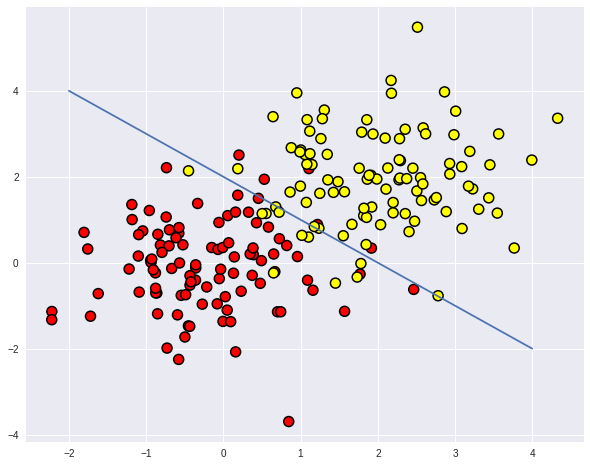

In [26]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt


# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

#рисуем график
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
#plt.show()
plt.plot(range(-2,5), range(4,-3,-1));



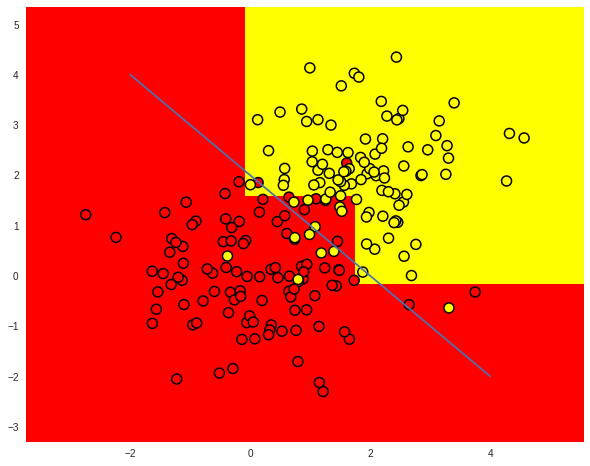

In [27]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

#рисуем график
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
#plt.show()
plt.plot(range(-2,5), range(4,-3,-1));



# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

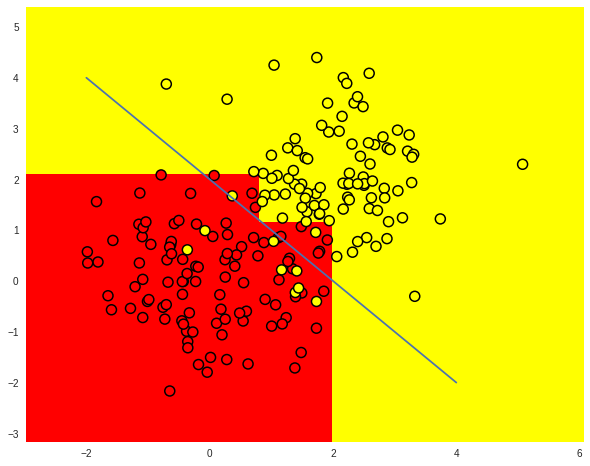

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

#рисуем график
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
#plt.show()
plt.plot(range(-2,5), range(4,-3,-1));



# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

#Вывод разделяющего дерева
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

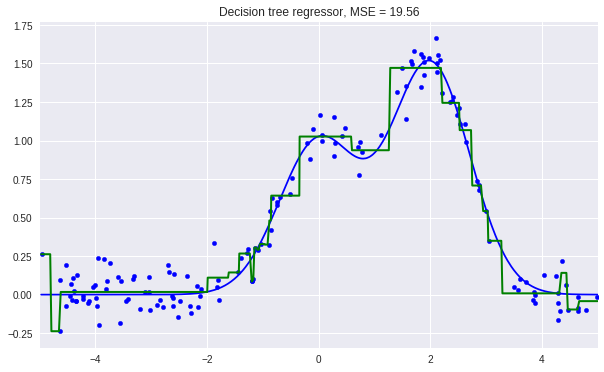

In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)



reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
#Обучение
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
#Оценка
from sklearn.metrics import accuracy_score
#Настройка параметров tree, кросс-валидация
from sklearn.model_selection import GridSearchCV, cross_val_score
#Settings of amount of neighbours in KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('сhurn.csv')
df['Int\'l Plan'] = pd.factorize(df['Int\'l Plan'])[0]
df['VMail Plan'] = pd.factorize(df['VMail Plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn', 'Phone'], axis=1, inplace=True)

#Обучение
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

#Вывод точности
tree_pred = tree.predict(X_holdout)
acc_tree = accuracy_score(y_holdout, tree_pred) # 0.94

knn_pred = knn.predict(X_holdout)
acc_knn = accuracy_score(y_holdout, knn_pred) # 0.88

print('Tree: ', acc_tree)
print('KNN: ', acc_knn)

#Подбор параметров for tree
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

tr_bst_prm = tree_grid.best_params_ #Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:
tr_bst_scr = tree_grid.best_score_
tr_acc_grd = accuracy_score(y_holdout, tree_grid.predict(X_holdout))

print('########## FOR TREE #########')
print ('Best parameters:', tr_bst_prm)
print('Best score: ', tr_bst_scr)
print('Accuracy: ', tr_acc_grd)

#Amount of neighbours in KNN
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

knn_bst_prm = knn_grid.best_params_
knn_bst_scr = knn_grid.best_score_
knn_acc_grd = accuracy_score(y_holdout, knn_grid.predict(X_holdout))


print('########## FOR KNN #########')
print ('Best parameters:', knn_bst_prm)
print('Best score: ', knn_bst_scr)
print('Accuracy: ', knn_acc_grd)







NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
#Обучение и настройка случайного леса
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score


df = pd.read_csv('сhurn.csv')
df['Int\'l Plan'] = pd.factorize(df['Int\'l Plan'])[0]
df['VMail Plan'] = pd.factorize(df['VMail Plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn', 'Phone'], axis=1, inplace=True)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953


export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
out_file='img/churn_tree.dot', filled=True)
!dot -Tpng 'img/churn_tree.dot' -o 'img/churn_tree.png'

print('Done')






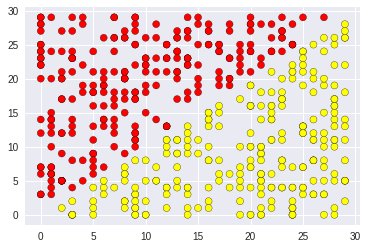

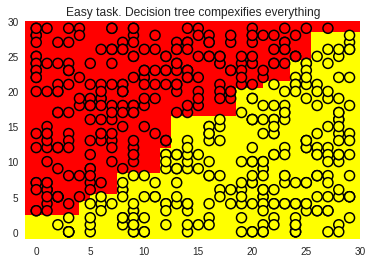

In [20]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#Оценка
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV, cross_val_score

def get_grid(data, eps):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

#plt.figure(figsize=(30, 30))

X, y = form_linearly_separable_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')
plt.show()

#Tree
tree = DecisionTreeClassifier(random_state=17).fit(X, y)
xx, yy = get_grid(X, eps=.05)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

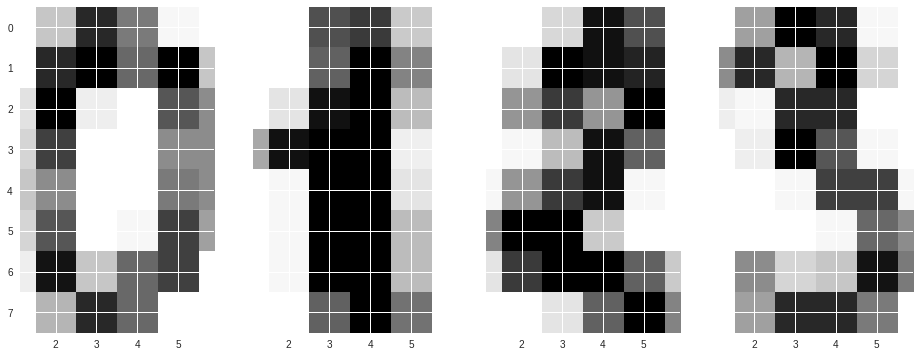

In [24]:
from sklearn.datasets import load_digits
import numpy as np

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

ar = np.array([[ 0., 0., 5., 13., 9., 1., 0., 0.],
[ 0., 0., 13., 15., 10., 15., 5., 0.],
[ 0., 3., 15., 2., 0., 11., 8., 0.],
[ 0., 4., 12., 0., 0., 8., 8., 0.],
[ 0., 5., 8., 0., 0., 9., 8., 0.],
[ 0., 4., 11., 0., 1., 12., 7., 0.],
[ 0., 2., 14., 5., 10., 12., 0., 0.],
[ 0., 0., 6., 13., 10., 0., 0., 0.]])

f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [8]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
#Обучение
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
#Оценка
from sklearn.metrics import accuracy_score
#Настройка параметров tree, кросс-валидация
from sklearn.model_selection import GridSearchCV, cross_val_score
#Settings of amount of neighbours in KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('сhurn.csv')
df['Int\'l Plan'] = pd.factorize(df['Int\'l Plan'])[0]
df['VMail Plan'] = pd.factorize(df['VMail Plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn', 'Phone'], axis=1, inplace=True)


#Обучение
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
#Вывод точности
tree_pred = tree.predict(X_holdout)
acc_tree = accuracy_score(y_holdout, tree_pred) # 0.94

knn_pred = knn.predict(X_holdout)
acc_knn = accuracy_score(y_holdout, knn_pred) # 0.88

print('Tree: ', acc_tree)
print('KNN: ', acc_knn)

#Подбор параметров for tree
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

tr_bst_prm = tree_grid.best_params_ #Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:
tr_bst_scr = tree_grid.best_score_
tr_acc_grd = accuracy_score(y_holdout, tree_grid.predict(X_holdout))

print('########## FOR TREE #########')
print ('Best parameters:', tr_bst_prm)
print('Best score: ', tr_bst_scr)
print('Accuracy: ', tr_acc_grd)

#Amount of neighbours in KNN
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

knn_bst_prm = knn_grid.best_params_
knn_bst_scr = knn_grid.best_score_
knn_acc_grd = accuracy_score(y_holdout, knn_grid.predict(X_holdout))


print('########## FOR KNN #########')
print ('Best parameters:', knn_bst_prm)
print('Best score: ', knn_bst_scr)
print('Accuracy: ', knn_acc_grd)


Tree:  0.94
KNN:  0.881
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    1.9s


########## FOR TREE #########
Best parameters: {'max_features': 18, 'max_depth': 6}
Best score:  0.941705957994
Accuracy:  0.946
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.3s finished


########## FOR KNN #########
Best parameters: {'knn__n_neighbors': 7}
Best score:  0.885983711959
Accuracy:  0.89


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])